# Analisando o dataset "Heart Failure" retirado do site Kaggle
Link do dataset e descrição dos dados: https://www.kaggle.com/fedesoriano/heart-failure-prediction

### Descrição das características
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]

## 1. Importando as bibliotecas e o dataset

In [2]:
# Importando as bibliotecas básicas de análise de dados
import numpy as np
from numpy import log10
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Lendo o arquivo .csv
heart = pd.read_csv('heartfailure-kaggle.csv')

In [4]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Com o quadro acima pode-se perceber a presença de dados conínuos e categóricos.
Conínuos:
* Age
* RestingBP
* Cholesterol
* MaxHR

Categóricos:
* Sex
* ChestPainType
* RestingECG
* ExerciseAngina
* ST_Slope
* HeartDisease

Abaixo varificamos os dados das colunas `FastingBS` e `Oldpeak`

In [5]:
heart['Oldpeak'].value_counts()

 0.0    368
 1.0     86
 2.0     76
 1.5     53
 3.0     28
 1.2     26
 0.2     22
 0.5     19
 1.4     18
 1.8     17
 2.5     16
 0.8     16
 1.6     16
 0.1     14
 0.6     14
 0.4     11
 0.3     11
 4.0      8
 0.7      7
 2.8      7
 1.3      7
 2.6      7
 1.1      7
 1.9      7
 1.7      6
 2.2      5
 0.9      4
 3.6      4
 2.4      4
 3.4      3
 2.1      2
-0.1      2
 4.2      2
 3.2      2
 3.5      2
-0.5      2
 2.3      2
-1.0      2
 2.9      1
 3.8      1
-0.9      1
-2.6      1
-1.5      1
 3.7      1
 5.0      1
-2.0      1
-0.8      1
 3.1      1
 4.4      1
 5.6      1
 6.2      1
-0.7      1
-1.1      1
Name: Oldpeak, dtype: int64

In [6]:
heart['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

Assim, percebe-se que `Oldpeak` é um variável contínua e `FastingBS` é uma variável categórica

In [7]:
# Mostrando algumas informações básicas do DataFrame
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


O dataset não possui nenhum dado nulo.

In [8]:
# Medidas de resumo do DataFrame
heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Avaliando os dados estatísticos da tabela acima verifica-se uma possível presença se outliers na coluna `Cholesterol`, uma vez que apresenta um alto valor no desvio padrão.

## **Pré-processamento**

Nessa seção é feito o pre-processamento dos dados a fim de melhora a análise dos mesmo.

In [9]:
# cópia do dataset
df = heart.copy()

**Dados Duplicados**

In [10]:
#verificando existência e removendo dados duplicados 
df.drop_duplicates(keep = False, inplace=True)
df.shape

(918, 12)

Não há dados duplicados uma vez que o número de linha do dataframe continua o mesmo.

**Remoção de Colunas**

Uma vez que apenas as características de idade, sexo, colesterol alto e presença ou não de diabetes são utilizadas para a análise, aqui são descartadas todas as colunas que não serão utilizadas.

In [11]:
df.drop(['ChestPainType', 'RestingBP', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope'], axis=1, inplace=True)

In [12]:
df.head()

,Age,Sex,Cholesterol,FastingBS,HeartDisease
0,40,M,289,0,0
1,49,F,180,0,1
2,37,M,283,0,0
3,48,F,214,0,1
4,54,M,195,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           918 non-null    int64 
 1   Sex           918 non-null    object
 2   Cholesterol   918 non-null    int64 
 3   FastingBS     918 non-null    int64 
 4   HeartDisease  918 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 43.0+ KB


In [14]:
df.describe()

,Age,Cholesterol,FastingBS,HeartDisease
count,918.000000,918.000000,918.000000,918.000000
mean,53.510893,198.799564,0.233115,0.553377
std,9.432617,109.384145,0.423046,0.497414
min,28.000000,0.000000,0.000000,0.000000
25%,47.000000,173.250000,0.000000,0.000000
50%,54.000000,223.000000,0.000000,1.000000
75%,60.000000,267.000000,0.000000,1.000000
max,77.000000,603.000000,1.000000,1.000000


### **Ajustes dos Dados**

Nessa seção, é feita a alteração dos dados da coluna sexo para 0 (mulheres) e 1 (homens) e também a remoção de outliers.

In [15]:
# Convertendo sexo em número
df['Sex'] = df['Sex'].apply(lambda x: 1 if (x=='M') else 0)

**Remoção de Outliers usando o método de  Tukey**

<AxesSubplot:>

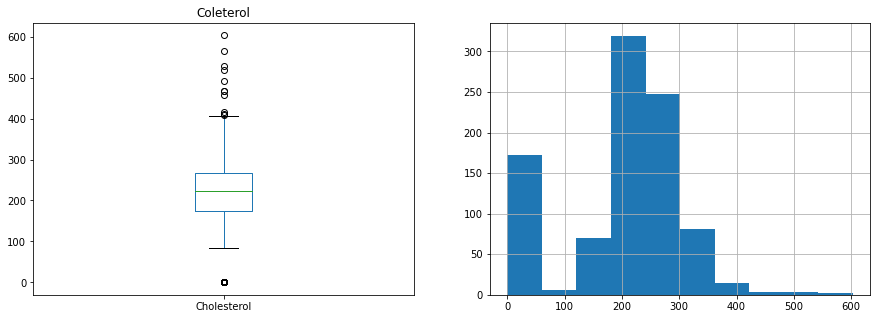

In [16]:
# box plot do colesterou e da taxa de açucar no sangue

plt.figure(figsize=(15,5))

#plot colesterol
plt.subplot(1,2,1)
df['Cholesterol'].plot.box()
plt.title('Coleterol')


#plot colesterol
plt.subplot(1,2,2)
df['Cholesterol'].hist()

A partir do gráfico pode-se verificar que existem valores tanto acima quanto abaixo do box plot. Assim é preciso verificar se tais valores são outlier ou não.

In [17]:
q1 = df['Cholesterol'].quantile(q=0.25)
q3 = df['Cholesterol'].quantile(q=0.75)
iqr = q3 - q1
print(iqr)

93.75


In [18]:
chol_inferior = df['Cholesterol'] < (q1-1.5*iqr)
chol_superior = df['Cholesterol'] > (q3+1.5*iqr)

In [19]:
df[chol_inferior]['Cholesterol'].value_counts()

0    172
Name: Cholesterol, dtype: int64

In [20]:
df[chol_superior]

,Age,Sex,Cholesterol,FastingBS,HeartDisease
28,53,0,468,0,0
30,53,1,518,0,1
69,44,1,412,0,0
76,32,1,529,0,1
103,40,1,466,1,1
149,54,1,603,1,1
250,44,1,491,0,1
496,58,1,458,1,0
616,67,0,564,0,0
667,65,0,417,1,0


Como é possível perceber os valores abaixo do gráfico box plot são todos 0 o que não é possível quando-se fala de colesterol, enquanto que os valores acima apesar de muito raro, são possíveis de se encontrar. Por isso serão removidos esses primeiros.

In [21]:
# removendo outliers
df.drop(df[chol_inferior].index, inplace=True)
df.shape

(746, 5)

<AxesSubplot:>

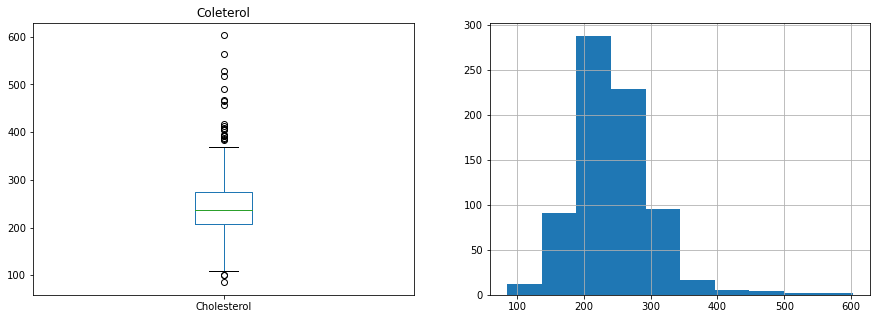

In [22]:
# box plot do colesterou e da taxa de açucar no sangue

plt.figure(figsize=(15,5))

#plot colesterol
plt.subplot(1,2,1)
df['Cholesterol'].plot.box()
plt.title('Coleterol')


#plot colesterol
plt.subplot(1,2,2)
df['Cholesterol'].hist()

In [23]:
df.describe()

,Age,Sex,Cholesterol,FastingBS,HeartDisease
count,746.000000,746.000000,746.000000,746.000000,746.000000
mean,52.882038,0.756032,244.635389,0.167560,0.477212
std,9.505888,0.429762,59.153524,0.373726,0.499816
min,28.000000,0.000000,85.000000,0.000000,0.000000
25%,46.000000,1.000000,207.250000,0.000000,0.000000
50%,54.000000,1.000000,237.000000,0.000000,0.000000
75%,59.000000,1.000000,275.000000,0.000000,1.000000
max,77.000000,1.000000,603.000000,1.000000,1.000000


Após a remoção dos outliers, pode-se perceber uma diminuição considerável no valor do desvio padrão da variável `Cholesterol`.

In [39]:
df['chol_level'] = pd.cut(df['Cholesterol'], [0,240,700], labels=['Baixo', 'Alto'])

In [40]:
df['age_cat'] = pd.cut(df['Age'], [0,59,74], labels=['Adulta','Idosa'])

In [41]:
dummy_variable_age = pd.get_dummies(df['age_cat'])
dummy_variable_age.head()

,Adulta,Idosa
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [42]:
dummy_variable_sex = pd.get_dummies(df['Sex'])
dummy_variable_sex.rename(columns={1: 'homem', 0: 'mulher'}, inplace=True)
dummy_variable_sex.head()

,mulher,homem
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [43]:
df.head()

,Age,Sex,Cholesterol,FastingBS,HeartDisease,chol_level,age_cat
0,40,1,289,0,0,Alto,Adulta
1,49,0,180,0,1,Baixo,Adulta
2,37,1,283,0,0,Alto,Adulta
3,48,0,214,0,1,Baixo,Adulta
4,54,1,195,0,0,Baixo,Adulta


In [44]:
dummy_variable_dia = pd.get_dummies(df['FastingBS'])
dummy_variable_dia.rename(columns={1: 'diabetes', 0: 'sem-diabetes'}, inplace=True)
dummy_variable_dia.head()

,sem-diabetes,diabetes
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [45]:
dummy_variable_cho = pd.get_dummies(df['chol_level'])
dummy_variable_cho.rename(columns={'Alto': 'high-chol', 'Baixo': 'low-chol'}, inplace=True)
dummy_variable_cho.head()

,low-chol,high-chol
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [46]:
df_final = df.copy()

In [47]:
df_final = pd.concat([df[['HeartDisease']], dummy_variable_cho,dummy_variable_age, dummy_variable_sex, dummy_variable_dia], axis=1)
df_final.head()

,HeartDisease,low-chol,high-chol,Adulta,Idosa,mulher,homem,sem-diabetes,diabetes
0,0,0,1,1,0,0,1,1,0
1,1,1,0,1,0,1,0,1,0
2,0,0,1,1,0,0,1,1,0
3,1,1,0,1,0,1,0,1,0
4,0,1,0,1,0,0,1,1,0


In [48]:
df_final.to_csv('heart-desease-corr-p.csv', index=False, header=True)